# Step 2: Implement Cross-Validation using Python
Apply cross-validation to evaluate model performance.

Dataset Information:
Number of samples: 150
Number of features: 4
Target classes: [0 1 2]

Random Forest Cross-Validation Results:
----------------------------------------
Individual fold scores: [0.96666667 0.96666667 0.93333333 0.96666667 0.9       ]
Mean Accuracy: 0.947 ± 0.027


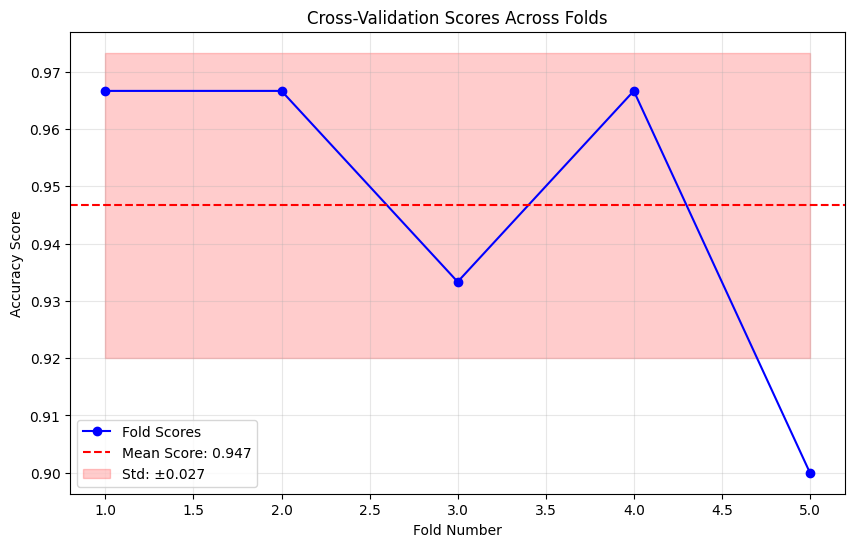

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target classes: {np.unique(y)}")

# Initialize model and k-fold
model = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("\nRandom Forest Cross-Validation Results:")
print("-" * 40)
print(f"Individual fold scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# Visualize fold scores distribution
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, 'bo-', label='Fold Scores')
plt.axhline(y=scores.mean(), color='r', linestyle='--',
            label=f'Mean Score: {scores.mean():.3f}')
plt.fill_between(range(1, len(scores) + 1),
                 scores.mean() - scores.std(),
                 scores.mean() + scores.std(),
                 alpha=0.2, color='r',
                 label=f'Std: ±{scores.std():.3f}')
plt.title('Cross-Validation Scores Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 3: Compare Models with Cross-Validation
Compare different models using cross-validation.


Random Forest Results:
--------------------
Mean Accuracy: 0.947 ± 0.027

SVC Results:
--------------------
Mean Accuracy: 0.987 ± 0.027


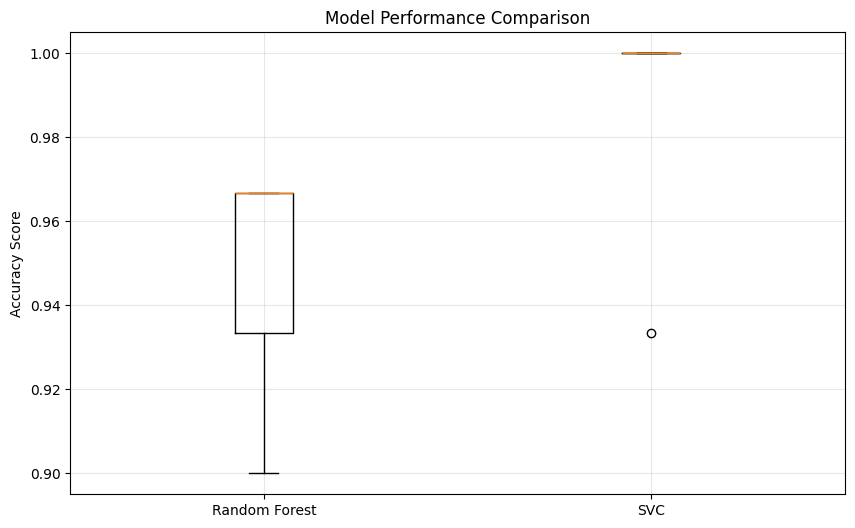

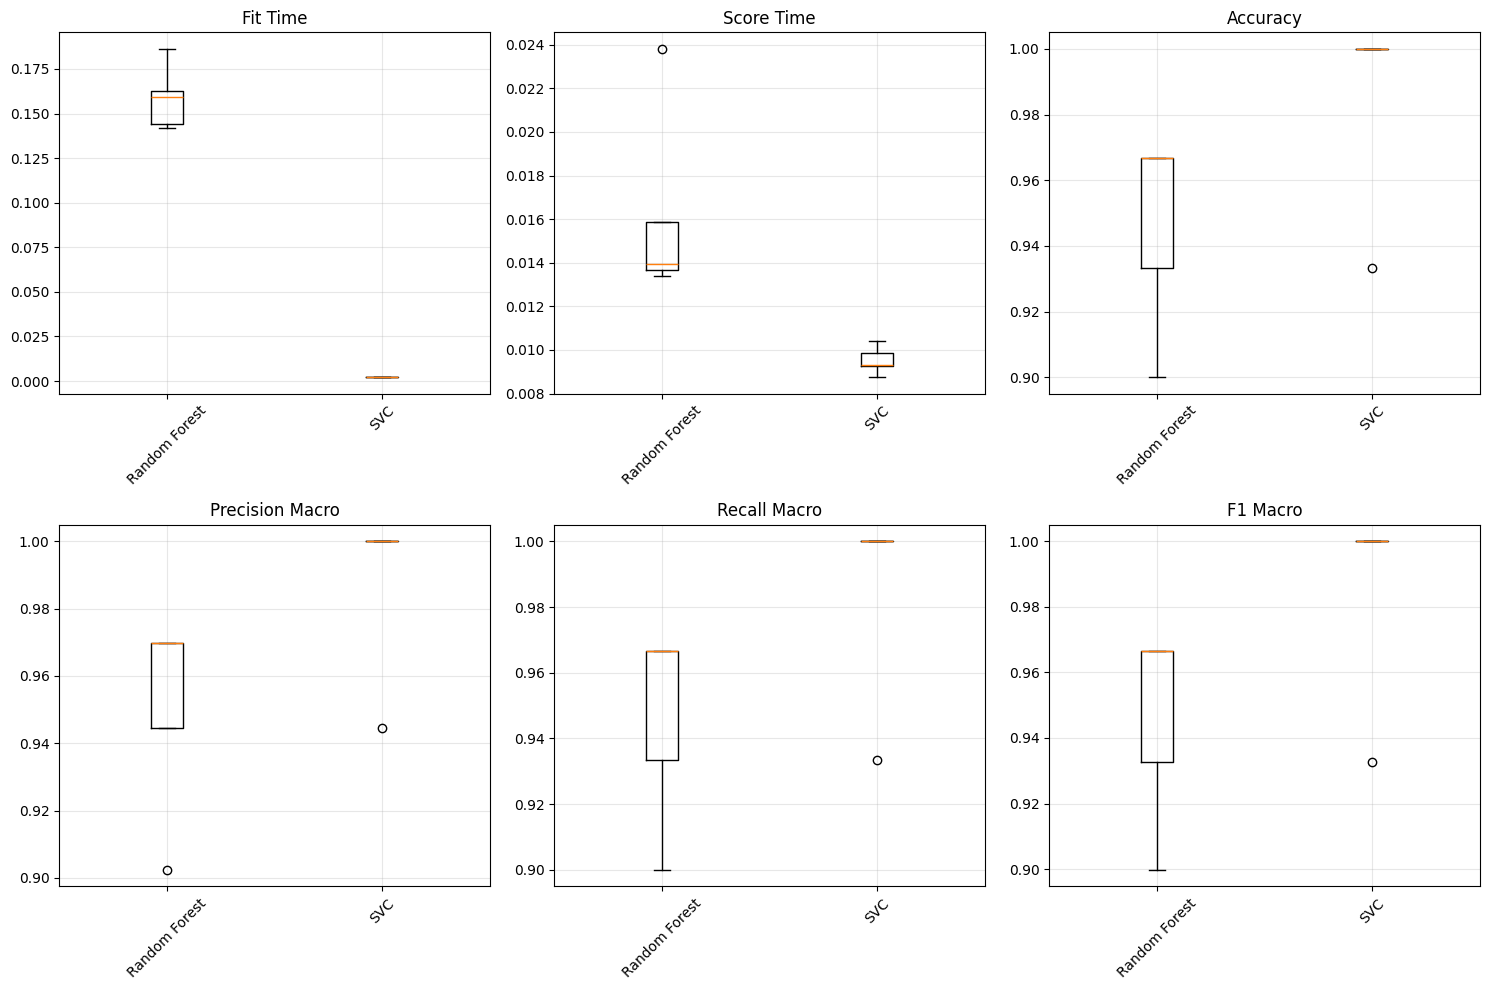

In [ ]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(kernel='linear', random_state=42)
}

# Perform cross-validation for each model
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"\n{name} Results:")
    print("-" * 20)
    print(f"Mean Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# Visualize model comparison
plt.figure(figsize=(10, 6))
plt.boxplot([scores for scores in cv_results.values()],
            tick_labels=cv_results.keys())
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy Score')
plt.grid(True, alpha=0.3)
plt.show()

# Extended cross-validation analysis
# =====================================

from sklearn.model_selection import cross_validate

def extended_cv_analysis(model, X, y, cv):
    """Perform extended cross-validation analysis with timing."""
    cv_results = cross_validate(model, X, y, cv=cv,
                              scoring=['accuracy', 'precision_macro',
                                     'recall_macro', 'f1_macro'],
                              return_train_score=True)
    return cv_results

# Perform extended analysis for each model
extended_results = {}
metrics = ['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro',
           'test_recall_macro', 'test_f1_macro']

for name, model in models.items():
    extended_results[name] = extended_cv_analysis(model, X, y, kf)

# Plot extended results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    data = [extended_results[name][metric] for name in models.keys()]
    axes[idx].boxplot(data, tick_labels=models.keys())
    axes[idx].set_title(metric.replace('test_', '').replace('_', ' ').title())
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Learning curves comparison
# =====================================

from sklearn.model_selection import learning_curve

def plot_learning_curves(models, X, y):
    plt.figure(figsize=(12, 6))

    for name, model in models.items():
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=5, n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 10))

        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        plt.plot(train_sizes, train_mean, label=f'{name} (train)')
        plt.plot(train_sizes, test_mean, label=f'{name} (test)')

    plt.title('Learning Curves Comparison')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_learning_curves(models, X, y)